 # Question 1: Extracting Tesla Stock Data Using yfinance

In [2]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data
tesla_data = tesla.history(period="max")

# Display first few rows
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


#  Question 2: Extracting Tesla Revenue Data Using Webscraping

In [18]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
tesla_table = tables[1]

# Wrap the HTML string in StringIO to avoid the FutureWarning
table_io = StringIO(str(tesla_table))

# Read the table into a DataFrame
tesla_revenue = pd.read_html(table_io)[0]

# Rename columns to something simpler
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column (remove commas and dollar signs)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', "", regex=True)

# Drop rows with empty or null revenue
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Show the last 5 rows
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


# Question 3: Extracting GameStop Stock Data Using yfinance 


In [5]:
# Create a Ticker object for GameStop
gamestop = yf.Ticker("GME")

# Get historical stock data
gme_data = gamestop.history(period="max")

# Display first few rows
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Question 4: Extracting GameStop Revenue Data Using Webscraping

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Import StringIO

# Step 1: Get webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Get the full table at index 1 (not just tbody)
gme_table = soup.find_all("table")[1]

# Step 4: Wrap table HTML string with StringIO and read into DataFrame
gme_revenue = pd.read_html(StringIO(str(gme_table)))[0]

# Step 5: Clean and rename columns
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Step 6: Show last 5 rows
print(gme_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


#  Question 5: Tesla Stock and Revenue Dashboard 

In [34]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
    
    # Plot stock closing price
    ax1.plot(stock_data.index, stock_data['Close'], label=f"{company_name} Stock Price")
    ax1.set_title(f"{company_name} Stock Price Over Time")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.legend()
    ax1.grid(True)
    
    # Plot revenue
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), label=f"{company_name} Revenue")
    ax2.set_title(f"{company_name} Revenue Over Time")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue (Millions USD)")
    ax2.legend()
    ax2.grid(True)
    
    # Auto format date labels on both axes to avoid overlap and warnings
    fig.autofmt_xdate()
    
    plt.tight_layout()
    plt.show()


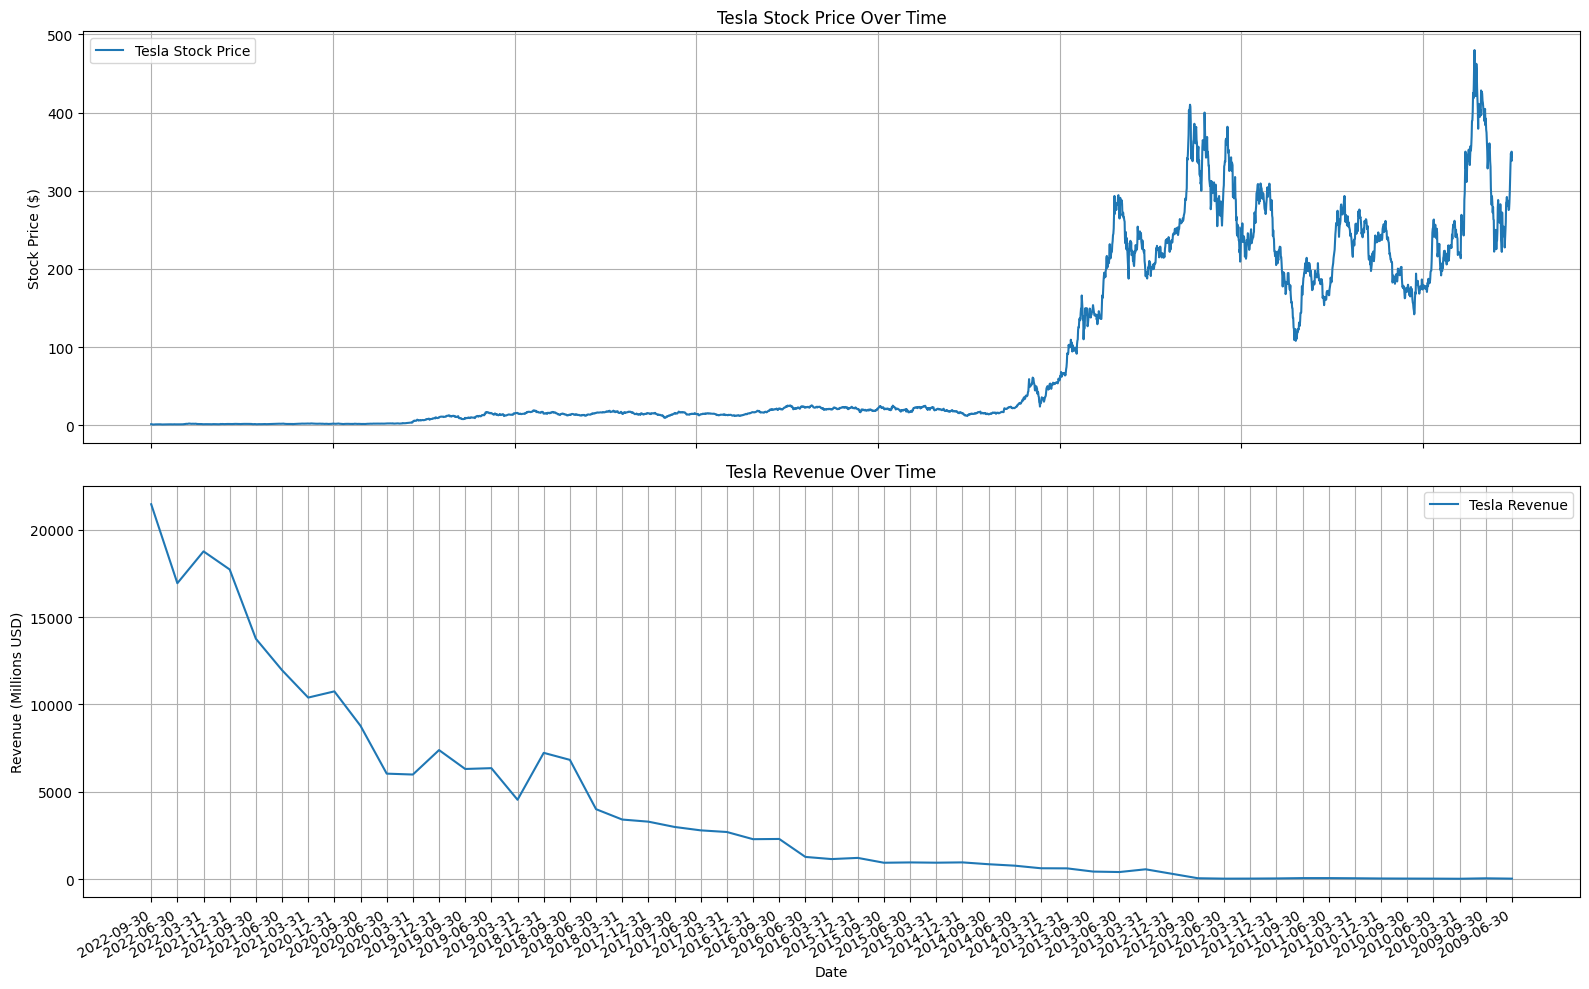

In [35]:
# Reset the index to get the 'Date' column
tesla_data = tesla_data.reset_index()

# Now call the make_graph function with the updated data
make_graph(tesla_data, tesla_revenue, 'Tesla')


# Question 6 - GameStop Stock and Revenue Dashboard

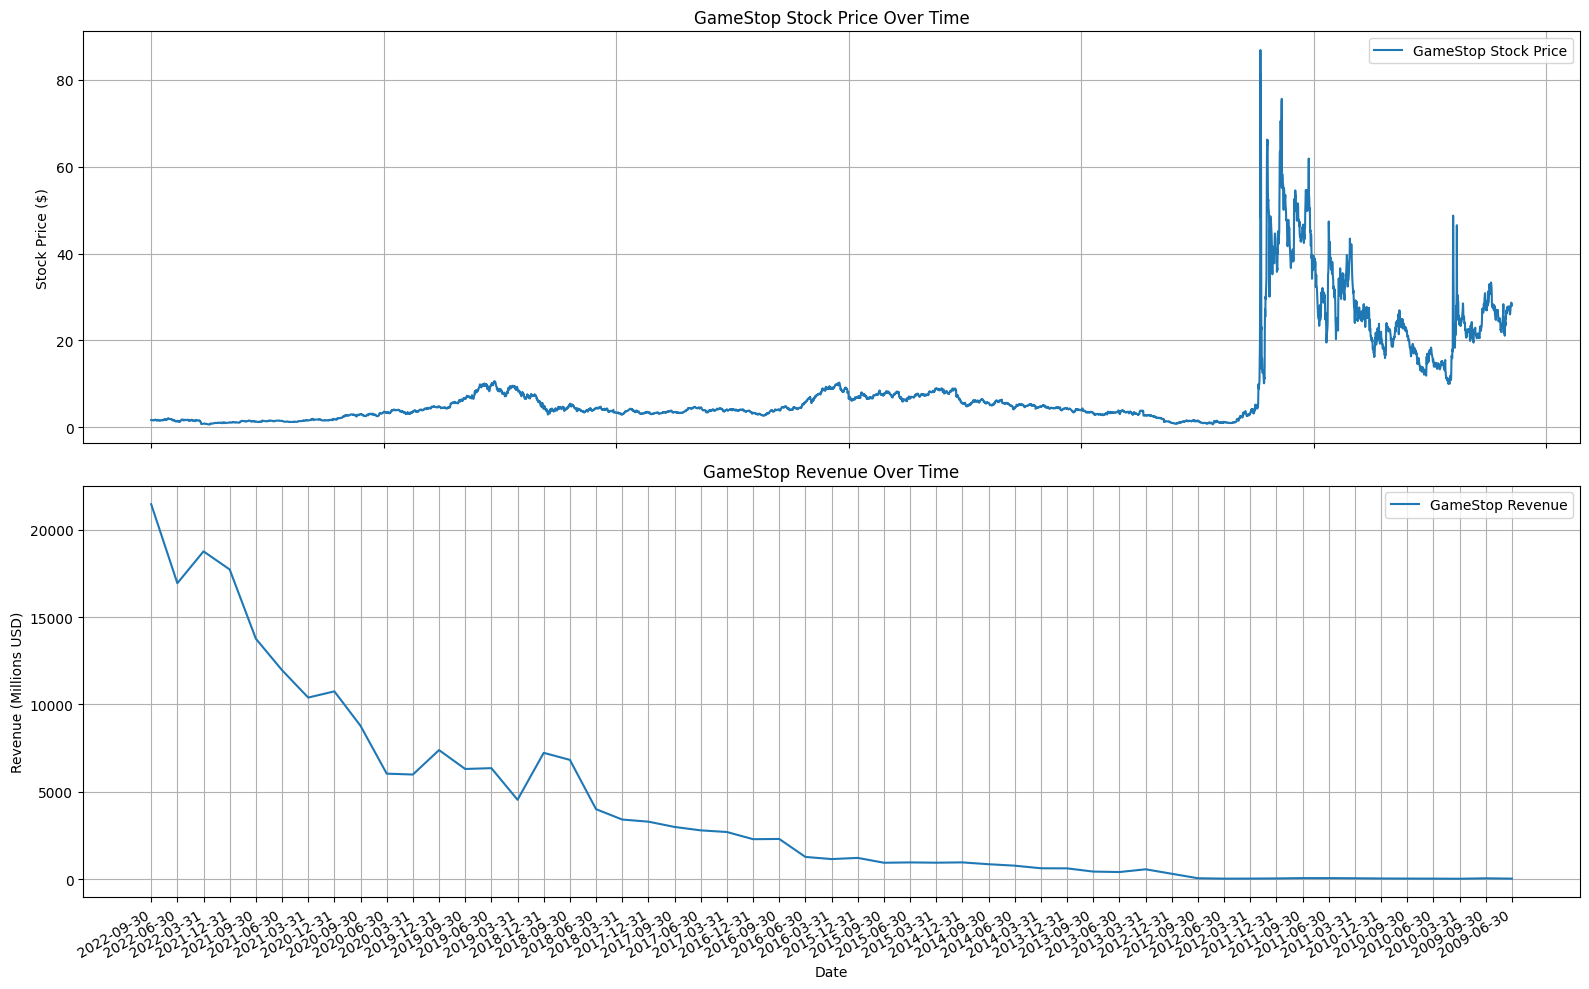

In [36]:
# Reset index to get 'Date' column from the index
gme_data = gme_data.reset_index()

# Now call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
